In [1]:
import numpy as np
import pandas as pd
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(60000, 28, 28)

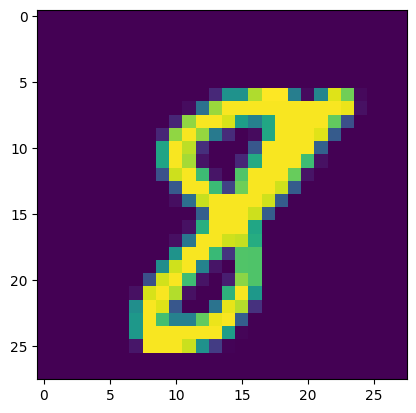

In [9]:
plt.imshow(train_data[55])

In [10]:
train_labels[55]

8

In [14]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics='accuracy')

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [24]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [25]:
train_labels[0]

5

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2664 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0717 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0386 - accuracy: 0.9882


In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0742 - accuracy: 0.9773


[0.07420514523983002, 0.9772999882698059]